### Compare the four groups (large online, small online, large offline, small offline)

In [88]:
from lib import *
import seaborn as sns

In [89]:
large_online = pd.read_csv(RESULT_DIR_PATH / "structural_measures_large_online.csv")
small_online = pd.read_csv(RESULT_DIR_PATH / "result_small_online.csv")
small_offline = pd.read_csv(RESULT_DIR_PATH / "structural_measures_small_offline.csv")
large_offline = pd.read_csv(RESULT_DIR_PATH / "largeoffline.csv")

In [90]:
large_online["type"] = "large_online"
small_online["type"] = "small_online"
large_offline["type"] = "large_offline"
small_offline["type"] = "small_offline"

In [91]:
large_online["line"] = "online"
small_online["line"] = "online"
large_offline["line"] = "offline"
small_offline["line"] = "offline"


In [92]:
def remove_digits(s):
    return ''.join([i for i in s if not i.isdigit()])

In [93]:
large_online.columns = list(map(remove_digits, large_online.columns))
small_online.columns = list(map(remove_digits, small_online.columns))
large_offline.columns = list(map(remove_digits, large_offline.columns))
small_offline.columns = list(map(remove_digits, small_offline.columns))

In [94]:
all_online_networks = pd.read_csv(DATA_DIR_PATH / "online_social_networks.csv")
all_offline_networks = pd.read_csv(DATA_DIR_PATH / "offline_social_networks.csv")

In [95]:
# concatenate all datasets
df = pd.concat([small_offline, small_online, large_online, large_offline]).merge(pd.concat([all_online_networks, all_offline_networks]), on="name")

In [96]:
df.head(5)

,Unnamed:,_,idx,dataset,name,n_nodes,frac_total,density,dbar,dcv,...,degree_assortativity,global_clustering,diameter,relative_size_of_largest_component,kind,mode,node_properties,edge_properties,gml_file_size,nodes_qcut
0,0.0,0,1,NaN,terrorists_911,62,1.0,0.080381,4.903226,0.815551,...,-0.08,0.36,5,1.0,Undirected,Unipartite,id name group,NaN,2048,small
1,0.0,0,1,NaN,sp_hospital,75,1.0,11.684324,864.640000,1.106573,...,0.09,0.75,3,1.0,Undirected,Unipartite,id status,time,101376,small
2,0.0,0,1,NaN,november17,22,1.0,0.285714,6.000000,0.596708,...,-0.25,0.53,4,1.0,Undirected,Unipartite,name Role Faction Resources,NaN,1024,small
3,0.0,0,1,NaN,intervals,113,1.0,0.347029,38.867257,0.472128,...,-0.12,0.50,3,1.0,Undirected,Unipartite,id,intervals,74752,small
4,0.0,0,1,NaN,contacts,113,1.0,3.289823,368.460177,0.876588,...,0.32,0.55,3,1.0,Undirected,Unipartite,id,time,76800,small


###  Analyse the complete data

In [97]:
df.groupby("type").agg(["mean","std"])

/var/folders/9p/yqgvxz3x5fv5wdy31vscjm4r0000gn/T/ipykernel_66942/3592287410.py:1: FutureWarning: ['name', 'line', 'group', 'kind', 'mode', 'node_properties', 'edge_properties', 'nodes_qcut'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby("type").agg(["mean","std"])


Unnamed:                _       idx      dataset      \
                   mean        std mean  std mean  std    mean std   
type                                                                 
large_offline       7.5   4.760952  0.0  0.0  1.0  0.0     NaN NaN   
large_online        NaN        NaN  0.0  0.0  1.0  0.0     NaN NaN   
small_offline       0.0   0.000000  0.0  0.0  1.0  0.0     NaN NaN   
small_online       28.0  16.598193  0.0  0.0  1.0  0.0     NaN NaN   

                    n_nodes                ... degree_assortativity            \
                       mean           std  ...                 mean       std   
type                                       ...                                  
large_offline    390.125000    272.682936  ...            -0.011250  0.183626   
large_online   12131.484848  31038.660625  ...            -0.071818  0.126106   
small_offline     85.117647     36.575064  ...            -0.071765  0.254196   
small_online     290.105263    187.526635  ...            -0.185263  0.249013   

              global_clustering            diameter            \
                           mean       std      mean       std   
type                                                            
large_offline          0.295000  0.353685  7.062500  6.845619   
large_online           0.241212  0.100024  7.606061  4.904968   
small_offline          0.346471  0.256855  4.588235  1.460258   
small_online           0.418246  0.126648  5.210526  1.800167   

              relative_size_of_largest_component           gml_file_size  \
                                            mean       std          mean   
type                                                                       
large_offline                           0.955625  0.131756  5.665152e+05   
large_online                            0.992121  0.030696  1.462092e+06   
small_offline                           1.000000  0.000000  1.443840e+05   
small_online                            0.985614  0.051996  3.229877e+04   

                             
                        std  
type                         
large_offline  1.363466e+06  
large_online   9.382191e+05  
small_offline  5.042540e+05  
small_online   3.001381e+04  

[4 rows x 66 columns]

In [98]:
df.head(2)

,Unnamed:,_,idx,dataset,name,n_nodes,frac_total,density,dbar,dcv,...,degree_assortativity,global_clustering,diameter,relative_size_of_largest_component,kind,mode,node_properties,edge_properties,gml_file_size,nodes_qcut
0,0.0,0,1,NaN,terrorists_911,62,1.0,0.080381,4.903226,0.815551,...,-0.08,0.36,5,1.0,Undirected,Unipartite,id name group,NaN,2048,small
1,0.0,0,1,NaN,sp_hospital,75,1.0,11.684324,864.640000,1.106573,...,0.09,0.75,3,1.0,Undirected,Unipartite,id status,time,101376,small


In [99]:
df.columns 

Index(['Unnamed: ', '_', 'idx', 'dataset', 'name', 'n_nodes', 'frac_total',
       'density', 'dbar', 'dcv', 'dmax', 'null__sim_g', 'null__sim',
       'null__sim_e', 'null__comp_g', 'null__comp', 'null__comp_e',
       'data_sim_g', 'data_sim', 'data_sim_e', 'data_comp_g', 'data_comp',
       'data_comp_e', 'type', 'line', 'group', 'nodes', 'edges', 'avg_degree',
       'std_dev_degree', 'largest_eigenvalue_hashimoto',
       'random_walk_mixing_time', 'degree_assortativity', 'global_clustering',
       'diameter', 'relative_size_of_largest_component', 'kind', 'mode',
       'node_properties', 'edge_properties', 'gml_file_size', 'nodes_qcut'],
      dtype='object')

Text(0.5, 1.0, 'Global Similarity of different social network groups')

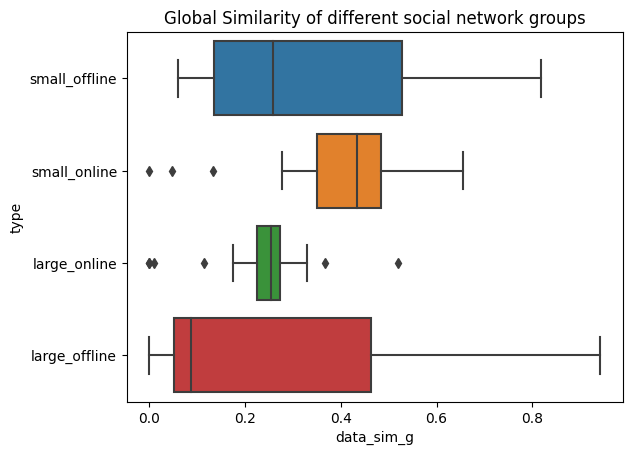

In [100]:
sns.boxplot(data=df, x='data_sim_g', y="type")
plt.title("Global Similarity of different social network groups")

Text(0.5, 1.0, 'Global Complementarity of different social network groups')

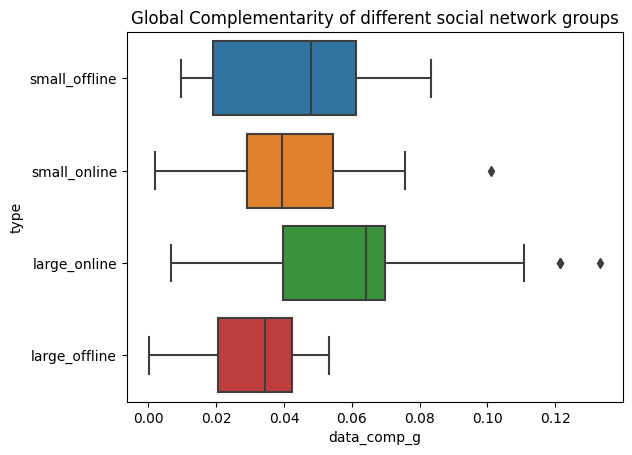

In [102]:
sns.boxplot(data=df, x='data_comp_g', y="type")
plt.title("Global Complementarity of different social network groups")

Text(0.5, 1.0, 'Global Complementarity of different social network groups')

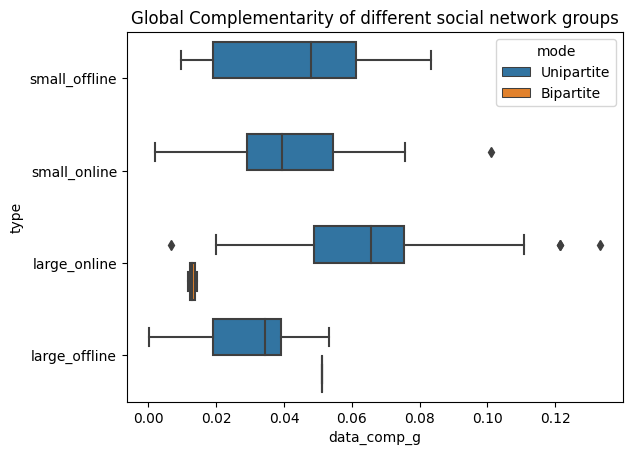

In [103]:
sns.boxplot(data=df, x='data_comp_g', y="type", hue="mode")
plt.title("Global Complementarity of different social network groups")

Text(0.5, 1.0, 'Global Similarity of different social network groups')

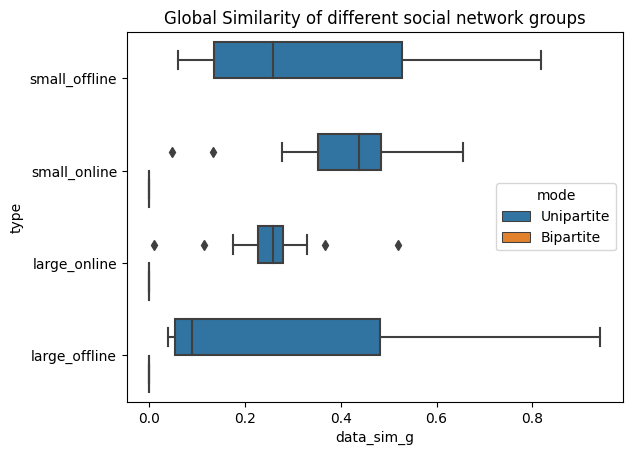

In [104]:
sns.boxplot(data=df, x='data_sim_g', y="type", hue="mode")
plt.title("Global Similarity of different social network groups")

Text(0.5, 1.0, 'Comparison of Global Similarity of online and offline social networks')

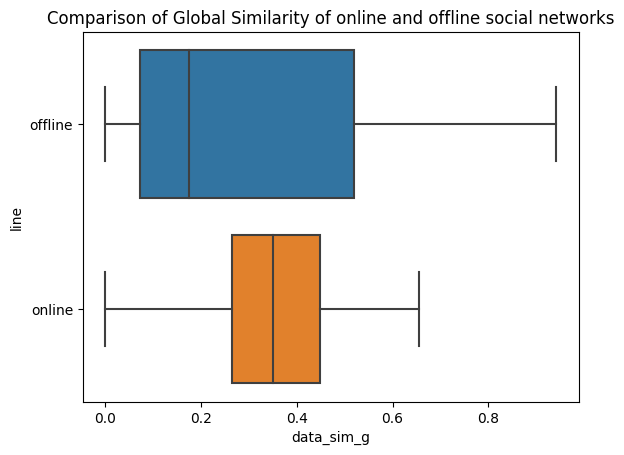

In [105]:
sns.boxplot(data=df, x='data_sim_g', y="line")
plt.title("Comparison of Global Similarity of online and offline social networks")

Text(0.5, 1.0, 'Comparison of Global Complementarity of online and offline social networks')

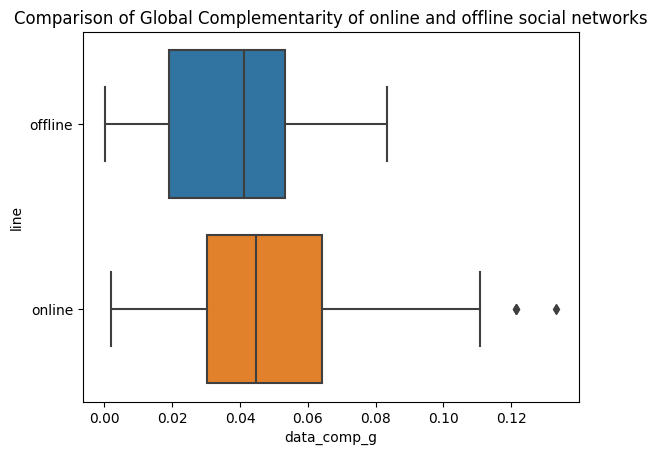

In [106]:
sns.boxplot(data=df, x='data_comp_g', y="line")
plt.title("Comparison of Global Complementarity of online and offline social networks")

Text(0.5, 1.0, 'Distributions of Global Similarity of Social Network Groups (KDE)')

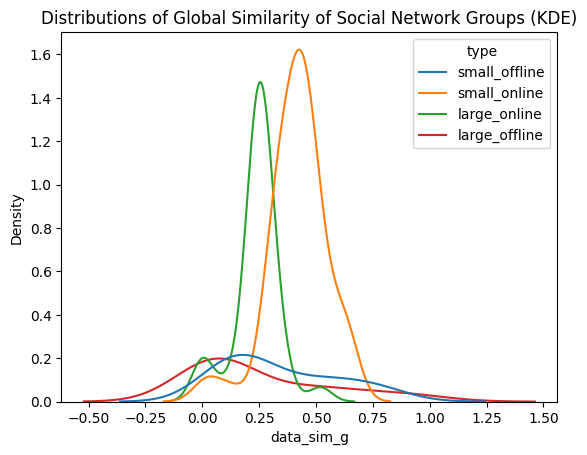

In [107]:
sns.kdeplot(data=df, x="data_sim_g", hue="type")
plt.title("Distributions of Global Similarity of Social Network Groups (KDE)")

Text(0.5, 1.0, 'Distributions of Global Complementarity of Social Network Groups (KDE)')

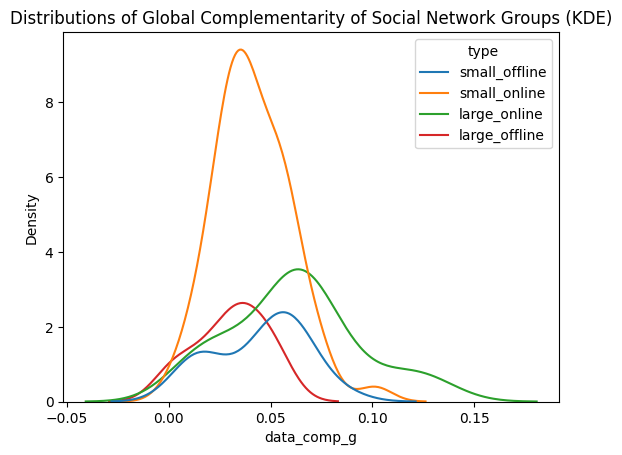

In [108]:
sns.kdeplot(data=df, x="data_comp_g", hue="type")
plt.title("Distributions of Global Complementarity of Social Network Groups (KDE)")

Text(0.5, 1.0, 'Distributions of Global Similarity of Social Networks (online vs offline)')

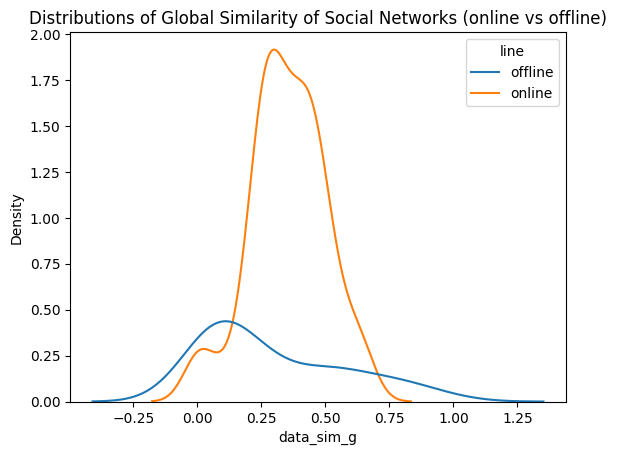

In [109]:
sns.kdeplot(data=df, x="data_sim_g", hue="line")
plt.title("Distributions of Global Similarity of Social Networks (online vs offline)")

Text(0.5, 1.0, 'Distributions of Global Complementarity of Social Networks (online vs offline)')

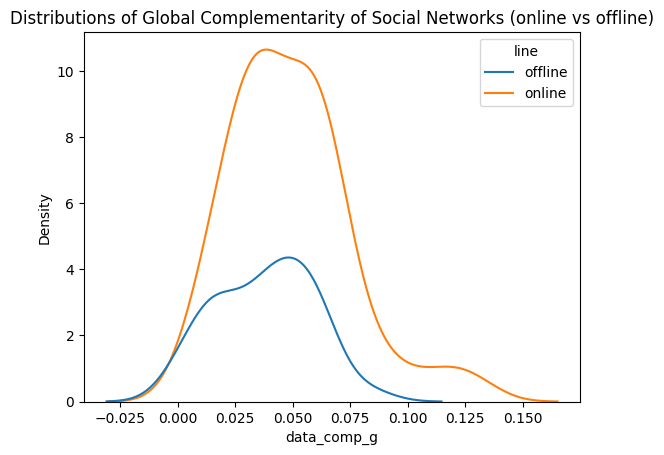

In [110]:
sns.kdeplot(data=df, x="data_comp_g", hue="line")
plt.title("Distributions of Global Complementarity of Social Networks (online vs offline)")

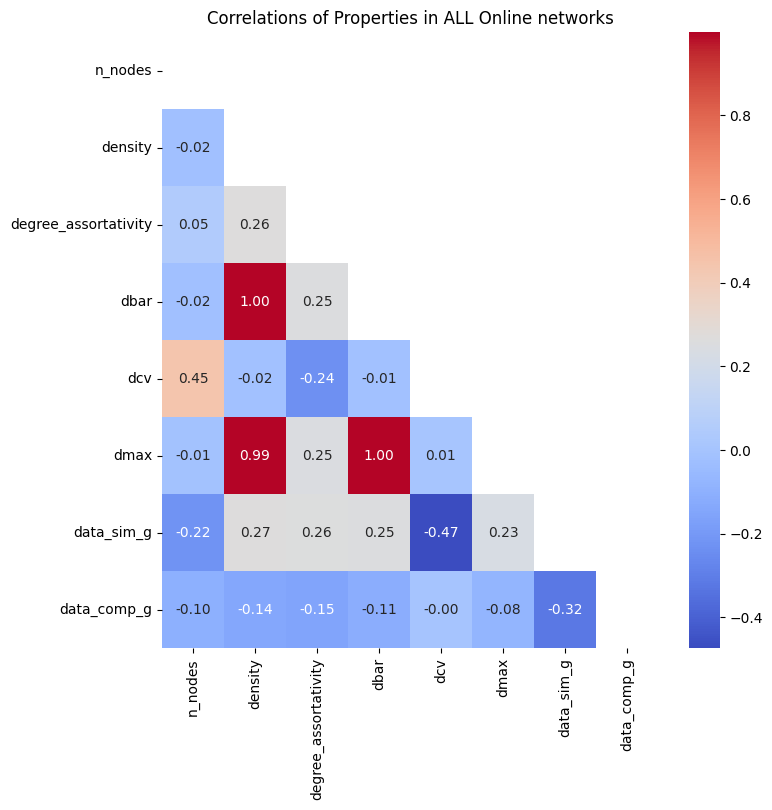

In [111]:
plot_correlation_matrix(df[["n_nodes", "density", "degree_assortativity", "dbar", "dcv", "dmax", "data_sim_g", "data_comp_g"]].corr(), "Correlations of Properties in ALL Online networks")

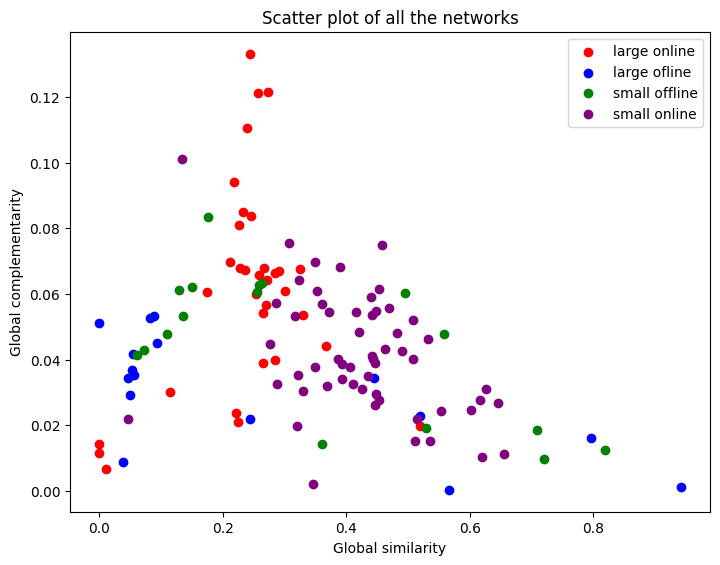

In [87]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(large_online["data_sim_g"], large_online["data_comp_g"], label="large online", color='r')
ax.scatter(large_offline["data_sim_g"], large_offline["data_comp_g"],label="large ofline", color='b')
ax.scatter(small_offline["data_sim_g"], small_offline["data_comp_g"],label="small offline", color='g')
ax.scatter(small_online["data_sim_g"], small_online["data_comp_g"],label="small online", color='purple')
ax.set_xlabel('Global similarity')
ax.set_ylabel('Global complementarity')
ax.set_title('Scatter plot of all the networks')
ax.legend()
plt.show()